In [2]:
##Gaus Seidel
import numpy as np

#Matrix Equation
x = [
    [[8, 4, 2],
    [1, 6, 3],
    [5, 6, 12]],
    [[12, -7, -1],
     [1, -7, 2],
     [8, -1, 12]],
    [[4, 2, 7],
     [3, -7, 5],
     [2, -1, 3]],
    [[14, 2, 1],
     [1, 8, 4],
     [9, 8, 18]]
]
y = [
    [10, 12, 15],
    [21, 12, 4],
    [8, 4, 5],
    [7, 2, 6]
]

def diagonal_dominance(matrix):
    mtrx = np.array(matrix)
    diagonal = np.array(np.diag(matrix))
    np.fill_diagonal(mtrx, 0)
    sum = np.sum(np.abs(mtrx), axis=1)
    
    return np.all(np.abs(diagonal) > sum)

def gauss_seidel(x,y):
    for i, (matrix, matrixY) in enumerate(zip(x, y)):
        print(f'Matrix #{i+1}')
        if not diagonal_dominance(matrix):
            print('Not Diagonally Dominant!')
            continue
        else:
            print('Diagonally Dominant')
            
        x = np.array(matrix)
        y = np.array(matrixY)
        diag_x = np.array(np.diag(x))
        np.fill_diagonal(x, 0)
        
        max_iteration = 50
        threshold = 0.090
        x = -x
        
        temp_result = np.zeros(diag_x.shape)
        for iter in range(max_iteration):
            new_result = np.array(temp_result)
            for i, row in enumerate(x):
                new_result[i] = (y[i] + np.dot(new_result, row)) / diag_x[i]
            
            difference = np.sqrt(np.dot(new_result - temp_result, new_result - temp_result))
            print(f'Iteration #{iter + 1} : {new_result}')
            print(f'Difference = {difference}')
            
            if(difference <= threshold):
                print('Convergent')
                break
            else :
                print('Not Convergent')
            temp_result = new_result
                
gauss_seidel(x, y)



Matrix #1
Diagonally Dominant
Iteration #1 : [ 1.25        1.79166667 -0.16666667]
Difference = 2.190969470855818
Not Convergent
Iteration #2 : [0.39583333 2.01736111 0.07638889]
Difference = 0.9163049054675799
Not Convergent
Iteration #3 : [0.22222222 1.92476852 0.19502315]
Difference = 0.22975703161001526
Not Convergent
Iteration #4 : [0.23885995 1.86267843 0.2191358 ]
Difference = 0.06865429955384911
Convergent
Matrix #2
Diagonally Dominant
Iteration #1 : [ 1.75       -1.46428571 -0.95535714]
Difference = 2.473729961711542
Not Convergent
Iteration #2 : [ 0.81622024 -1.87064201 -0.36670033]
Difference = 1.1762597197414264
Not Convergent
Iteration #3 : [ 0.6282338  -1.72930955 -0.22959833]
Difference = 0.2722328425469943
Not Convergent
Iteration #4 : [ 0.7221029  -1.67672768 -0.28779591]
Difference = 0.12232423662530427
Not Convergent
Iteration #5 : [ 0.74792586 -1.68966656 -0.30608945]
Difference = 0.034189089310782864
Convergent
Matrix #3
Not Diagonally Dominant!
Matrix #4
Diagonall

C:\Users\vince\AppData\Local\Temp\ipykernel_34080\2211367691.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'or', label='Data Points', color='#00b88a')


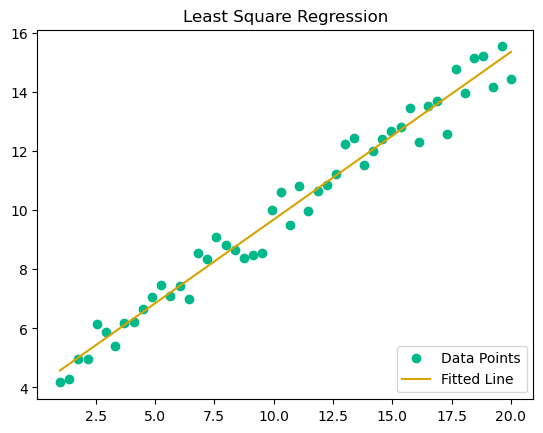

In [3]:
##Least Square Regression & Plotting
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, 20, 50)
y = np.linspace(5, 15, 50)
for i in range(50):
    if i % 2 != 0: 
        y[i] += np.random.uniform(-1, 1)
    else:
        y[i] += np.random.uniform(-1, 1)
        
        
def least_square(x, y):
    x = np.array(x)
    y = np.array(y)
    ones = np.ones(np.size(x))
    
    A = np.vstack((x, ones)).T
    Y = y[:, np.newaxis]
    
    first = np.linalg.inv(np.dot(A.T, A))
    alpha = np.dot(np.dot(first, A.T), y)
    
    plt.plot(x, y, 'or', label='Data Points', color='#00b88a')
    plt.plot(x, alpha [0] * x + alpha[1], label='Fitted Line', color='#d6a400')
    plt.title('Least Square Regression')
    plt.legend(loc='lower right')
    plt.show()
least_square(x, y)

In [4]:
##Root Finding
import numpy as np

def f(x):
    return 8 * (x**5) - 10 * (x**4) + (x**3) + 2 * (x**2) - 9 * x + 13
def g(x):
    return 40 * (x**4) - 40 * (x**3) + 3 * (x**2) + 4 * x - 9

#Newton Raphson
def newton_raphson(x, tolerance=0.090, iteration=50):
    for i in range(iteration):
        x = x - (f(x)/g(x))
        print('Iteration #',i+1, 'new root = ', x)
        if np.abs(f(x)) < tolerance:
            print('Final root answer is ', x)
            return x
        
print('With Newton Raphson')
print((newton_raphson(5)))
print('')

#Bisection
iter = 0
def bisection(left, right, tolerance=0.090):
    global iter
    iter += 1
    
    if(np.sign(f(left)) == np.sign(f(right))):
        print('Invalid left and right parameter')
        return False
    
    mid = left + (right-left)/2
    print(f'Iteration #{iter}: f({mid}) = {f(mid)}')
    
    if(np.abs(f(mid)) < tolerance):
        print(f'Root found at {mid}')
        return True
    elif (np.sign(f(left)) == np.sign(f(mid))):
        bisection(mid, right, tolerance)
    elif (np.sign(f(right)) == np.sign(f(mid))):
        bisection(left, mid, tolerance)
        
print('With Bisection')
bisection(-10, 8)
    


With Newton Raphson
Iteration # 1 new root =  4.059394603206213
Iteration # 2 new root =  3.309726207472683
Iteration # 3 new root =  2.7136779793915182
Iteration # 4 new root =  2.2413748455764324
Iteration # 5 new root =  1.8681343500337189
Iteration # 6 new root =  1.5710520173340736
Iteration # 7 new root =  1.3209905431493136
Iteration # 8 new root =  1.0434622532636735
Iteration # 9 new root =  -10.90447641710416
Iteration # 10 new root =  -8.677343307151903
Iteration # 11 new root =  -6.896696235790187
Iteration # 12 new root =  -5.473622728769812
Iteration # 13 new root =  -4.337215836274071
Iteration # 14 new root =  -3.431169015591493
Iteration # 15 new root =  -2.711260643742435
Iteration # 16 new root =  -2.143778628537372
Iteration # 17 new root =  -1.705118649836952
Iteration # 18 new root =  -1.3827534216212092
Iteration # 19 new root =  -1.1756184711815993
Iteration # 20 new root =  -1.0819735176046303
Iteration # 21 new root =  -1.0636334151565525
Final root answer is 

In [5]:
##Integral Riemann
def f(x):
    return 40 * (x**4) - 40 * (x**3) + 3 * (x**2) + 4 * x - 9

startPoint = 5
endPoint = 15
n = 50000
h = (endPoint - startPoint) / n
points = np.linspace(startPoint, endPoint, n)

#left Rieman
leftRieman = h * (np.sum(f(points[:-1])))
print(f'Left Rieman = {leftRieman}')

#Right Rieman
rightRieman = h * (np.sum(f(points[1:])))
print(f'Right Rieman = {rightRieman}')

#Middle Rieman
middleRieman = h * np.sum((f((points[:-1])) + f(points[1:]))/2)
print(f'Middle Rieman = {middleRieman}')

trapeZoidRieman = (h/2) * (f(points[0]) + f(points[1]) + 2  * np.sum(f(points[1:-1])))
print(f'Trapezoid Rieman = {trapeZoidRieman}')


Left Rieman = 5553261.866453566
Right Rieman = 5553635.994453565
Middle Rieman = 5553448.930453566
Trapezoid Rieman = 5553261.866794273
